In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def make_plot(df,vmax):
    print('Making plot...')

    # round lambda1 and lambda2 to the nearest base-10 exponent, except for the one called 0.0
    df['lambda1'] = df['lambda1'].apply(lambda x: -6.0 if x==0.0 else np.round(np.log10(x)))
    df['lambda2'] = df['lambda2'].apply(lambda x: -6.0 if x==0.0 else np.round(np.log10(x)))
    df['lr'] = np.round(np.log10(df['lr']))

    # average the test loss over all "inner"
    df = df.groupby(['modeltype','K','lambda1','lambda2','lr']).mean().reset_index()
    # make a subplot of all values of LR in the df. Each subplot should be a seaborn heatmap with "l1" on the x-axis and "l2" on the y-axis. The color of each cell should be the test loss.
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    plt.subplots(2,5,figsize=(20,8))
    for i,lr in enumerate(df['lr'].unique()):
        if i==4:
            cbar = True
        else:
            cbar = False
        plt.subplot(2,5,i+1)
        sns.heatmap(df[df['lr']==lr].pivot(index='lambda2',columns='lambda1',values='test_loss'),cmap=cmap,vmax=vmax[0],cbar=cbar)
        plt.title('test, lr='+str(lr)+', iter='+str(int(np.mean(df[df['lr']==lr]['iter']))))
        plt.xlabel('')
        plt.ylabel('$\lambda_2$')
        plt.subplot(2,5,i+6)
        sns.heatmap(df[df['lr']==lr].pivot(index='lambda2',columns='lambda1',values='train_loss'),cmap=cmap,vmax=vmax[1],cbar=cbar)
        plt.title('train, lr='+str(lr)+', iter='+str(int(np.mean(df[df['lr']==lr]['iter']))))
        plt.xlabel('$\lambda_1$')
        plt.ylabel('$\lambda_2$')

Making plot...


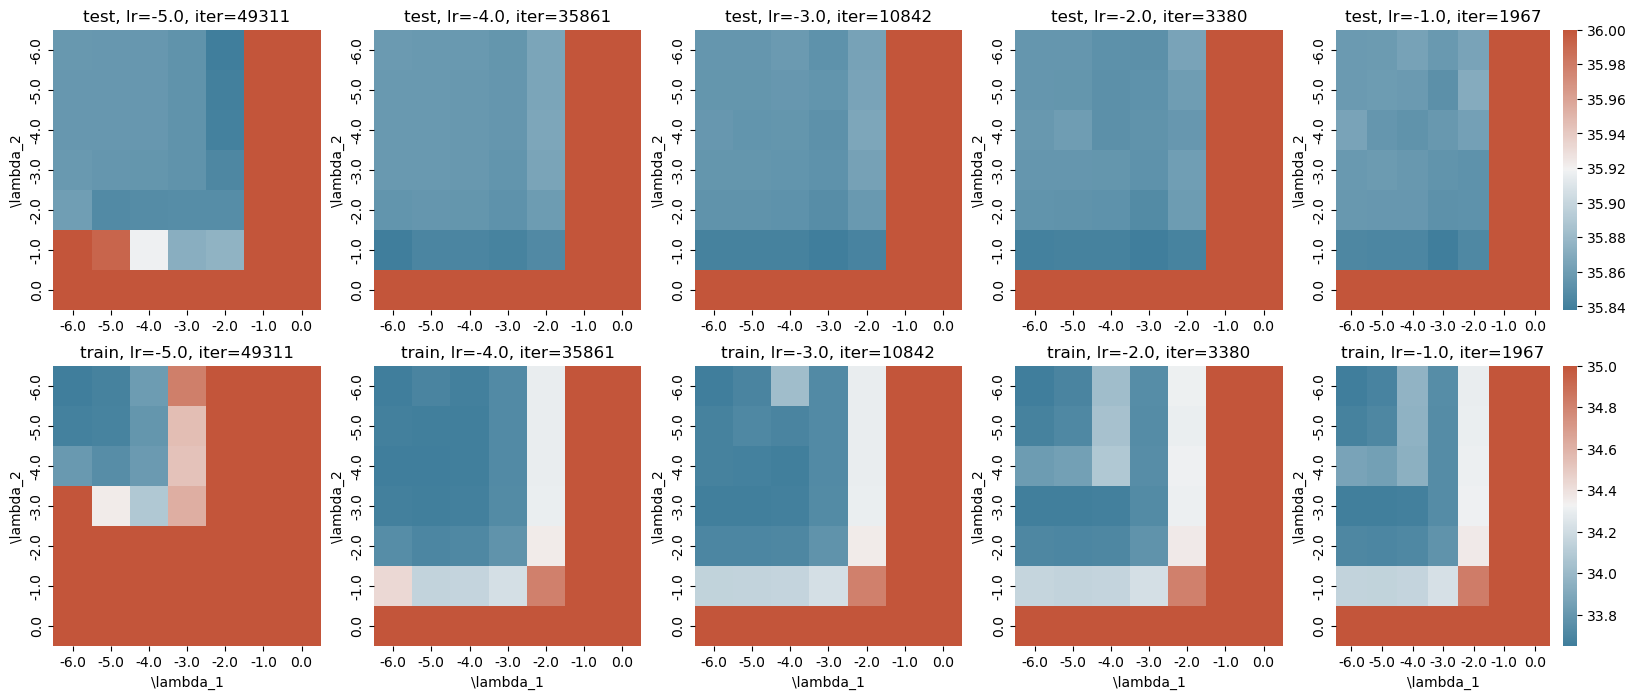

In [10]:
df = pd.read_csv('../data/SPCA_LR_results_K=5_group.csv')
df = df[df['inner']<10]
make_plot(df,vmax=[36,35])
plt.savefig('SPCA_LR_heatmap_K=5_group_mean.png')

Making plot...


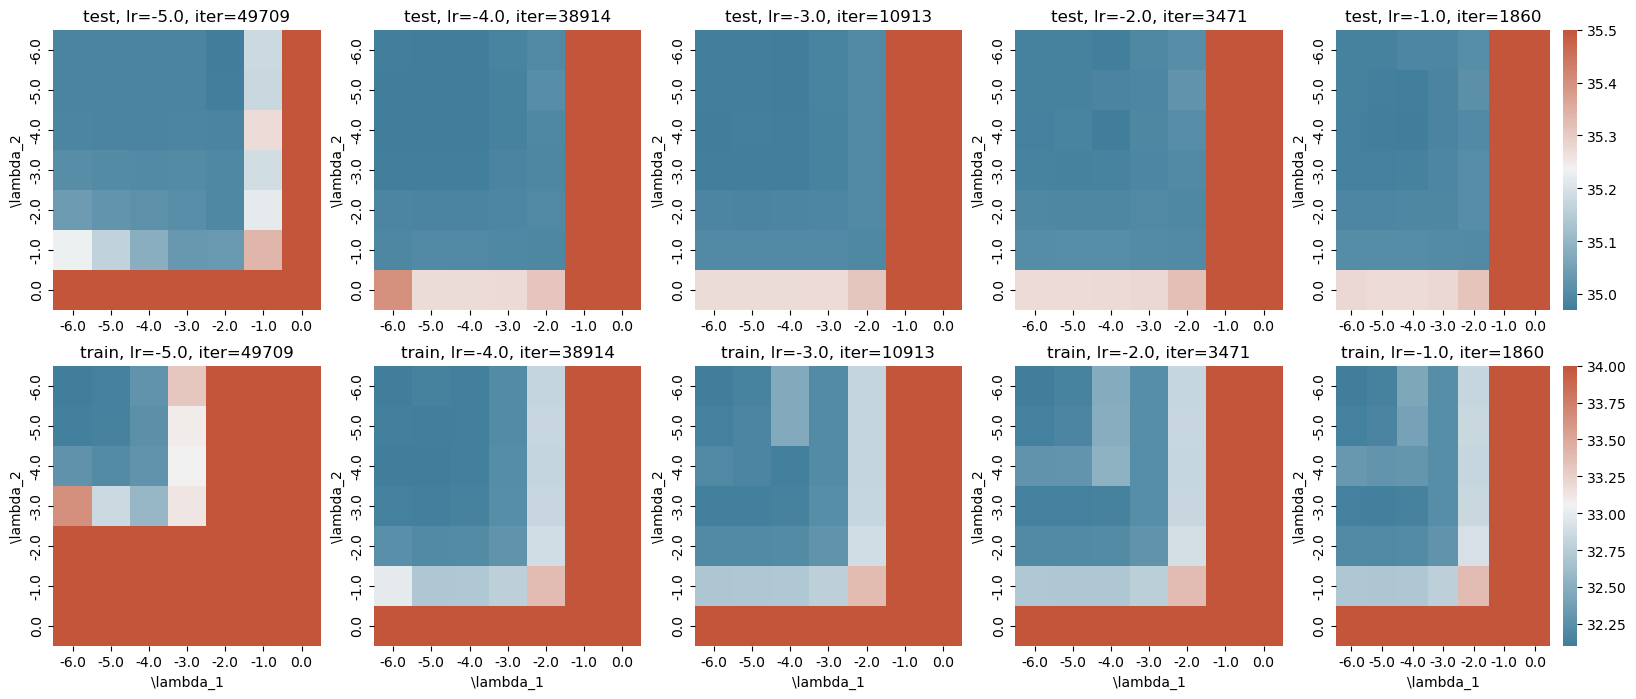

In [11]:
df = pd.read_csv('../data/SPCA_LR_results_K=5_mm.csv')
df = df[df['inner']<10]
make_plot(df,vmax=[35.5,34])
plt.savefig('SPCA_LR_heatmap_K=5_mm_mean.png')

Making plot...


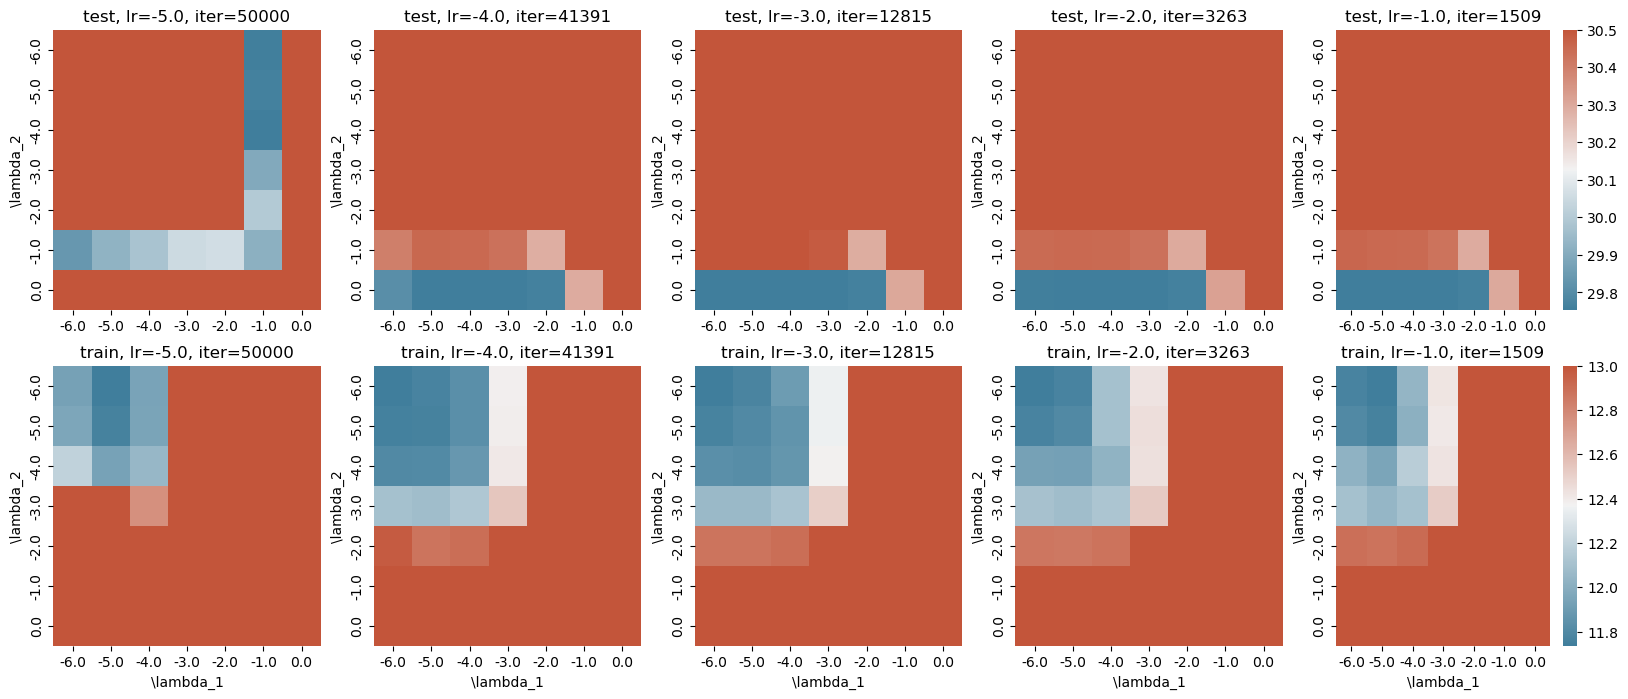

In [12]:
df = pd.read_csv('../data/SPCA_LR_results_K=5_mmms.csv')
df = df[df['inner']<10]
make_plot(df,vmax=[30.5,13])
plt.savefig('SPCA_LR_heatmap_K=5_mmms_mean.png')